# Aditya Vikram Mahendru 
## 24WU0102119

## Question 1

The `describe()` method returns the description of the data in the DataFrame.  
If the DataFrame contains numerical data, the description contains this information for each column:

- **count** — The number of non-empty values.
- **mean** — The average (mean) value.
- **std** — The standard deviation.
- **min** — The minimum value.
- **25%** — The 25th percentile*.
- **50%** — The 50th percentile*.
- **75%** — The 75th percentile*.
- **max** — The maximum value.

\*Percentiles indicate the value below which a given percentage of observations fall.


In [ ]:
import pandas as pd

data = {
    'Column 1': [10, 13, 9],
    'Column 2': [18, 15, 20],
    'Column 3': [11, 8, 3]
}

df = pd.DataFrame(data)

# Use describe() to get the statistical summary
print(df.describe())


                0          1          2
count    3.000000   3.000000   3.000000
mean    10.666667  17.666667   7.333333
median  10.000000  18.000000   8.000000
mode     9.000000  15.000000   3.000000
range    4.000000   5.000000   8.000000
std      2.081666   2.516611   4.041452
25%      9.500000  16.500000   5.500000
30%      9.600000  16.800000   6.000000
75%     11.500000  19.000000   9.500000
QD       1.000000   1.250000   2.000000
beta1    1.293343  -0.585583  -0.722109
beta2         NaN        NaN        NaN
min      9.000000  15.000000   3.000000
max     13.000000  20.000000  11.000000


### Function: `newdescribe()`

Build a new function named `newdescribe()` that generates a description containing the following statistical information for each column:

- **count**: The number of non-empty values.
- **mean**: The average (mean) value.
- **median**: The median value.
- **mode**: The mode value.
- **range**: The difference between the maximum and minimum values.
- **std**: The standard deviation.
- **25%**: The 25th percentile.
- **30%**: The 30th percentile.
- **75%**: The 75th percentile.
- **QD**: The quartile deviation.
- **beta1**: The relative measure of skewness.
- **beta2**: The relative measure of kurtosis.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode

# Define the newdescribe function
def newdescribe(df):
    description = {}
    
    for column in df.select_dtypes(include=[np.number]).columns:
        data = df[column].dropna()  # Drop NaNs
        
        count = data.count()
        mean_val = data.mean()
        median_val = data.median()
        mode_val = mode(data, keepdims=False).mode[0] if not data.empty else np.nan
        range_val = data.max() - data.min()
        std_val = data.std()
        percentile_25 = data.quantile(0.25)
        percentile_30 = data.quantile(0.30)
        percentile_75 = data.quantile(0.75)
        qd = (percentile_75 - percentile_25) / 2  # Quartile Deviation
        beta1 = skew(data)  # Skewness
        beta2 = kurtosis(data, fisher=False)  # Kurtosis (normal dist = 3, fisher=False gives Pearson definition)
        
        description[column] = {
            'count': count,
            'mean': mean_val,
            'median': median_val,
            'mode': mode_val,
            'range': range_val,
            'std': std_val,
            '25%': percentile_25,
            '30%': percentile_30,
            '75%': percentile_75,
            'QD': qd,
            'beta1 (Skewness)': beta1,
            'beta2 (Kurtosis)': beta2
        }
        
    return pd.DataFrame(description)

# Creating a sample DataFrame
data = {
    'Column 1': [10, 13, 9],
    'Column 2': [18, 15, 20],
    'Column 3': [11, 8, 3]
}

df = pd.DataFrame(data)

# Display describe() method output
print("Describe Method Output:")
print(df.describe())

# Display custom newdescribe() function output
print("\nNewDescribe Method Output:")
print(newdescribe(df))


## Question 2
### Simulate a Coin Toss Experiment in Python:

#### a) Perform 1000 coin flips and record the number of heads and tails.  



After 1000 flips:
Heads: 505 (50.50%)
Tails: 495 (49.50%)


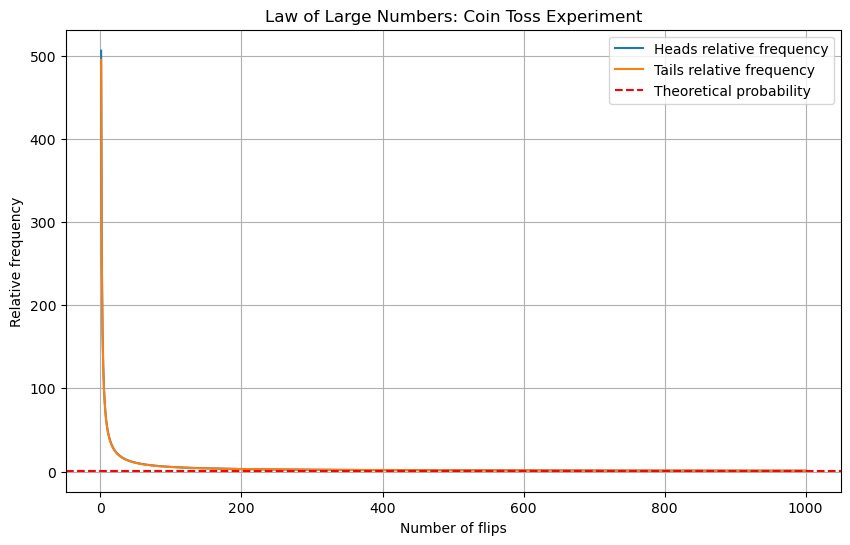

In [ ]:
import random

# Set the number of flips
num_flips = 1000

# Initialize counters
heads = 0
tails = 0

# Perform the coin flips
for _ in range(num_flips):
    # random.random() returns a value between 0 and 1
    if random.random() < 0.5:
        heads += 1
    else:
        tails += 1

print(f"After {num_flips} flips:")
print(f"Heads: {heads} ({(heads/num_flips)*100:.2f}%)")
print(f"Tails: {tails} ({(tails/num_flips)*100:.2f}%)")

#### b) Compute the relative frequency of heads and tails as the number of flips increases.

In [ ]:
import random
import matplotlib.pyplot as plt

num_flips = 1000

# Initialize variables
heads = 0
tails = 0
heads_freq = []  # To store relative frequency of heads at each step
tails_freq = []   # To store relative frequency of tails at each step

# Perform the coin flips
for i in range(1, num_flips + 1):
    if random.random() < 0.5:
        heads += 1
    else:
        tails += 1
    
    # Calculate relative frequencies
    heads_freq.append(heads / i)
    tails_freq.append(tails / i)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_flips + 1), heads_freq, label='Heads frequency')
plt.plot(range(1, num_flips + 1), tails_freq, label='Tails frequency')
plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical probability')
plt.xlabel('Number of flips')
plt.ylabel('Relative frequency')
plt.title('Coin Toss Experiment: Convergence to Theoretical Probability')
plt.legend()
plt.grid(True)
plt.show()

## Question 3: 
### Dice Roll Simulation

Implement a function in Python that simulates rolling two dice 1000 times and:

a) Computes the probability distribution of their sum.

b) Plots the probability mass function (PMF).


Probability distribution of sums:
Sum 2: 0.0260 (2.6%)
Sum 3: 0.0590 (5.9%)
Sum 4: 0.0790 (7.9%)
Sum 5: 0.1180 (11.8%)
Sum 6: 0.1560 (15.6%)
Sum 7: 0.1510 (15.1%)
Sum 8: 0.1370 (13.7%)
Sum 9: 0.1100 (11.0%)
Sum 10: 0.0910 (9.1%)
Sum 11: 0.0450 (4.5%)
Sum 12: 0.0280 (2.8%)


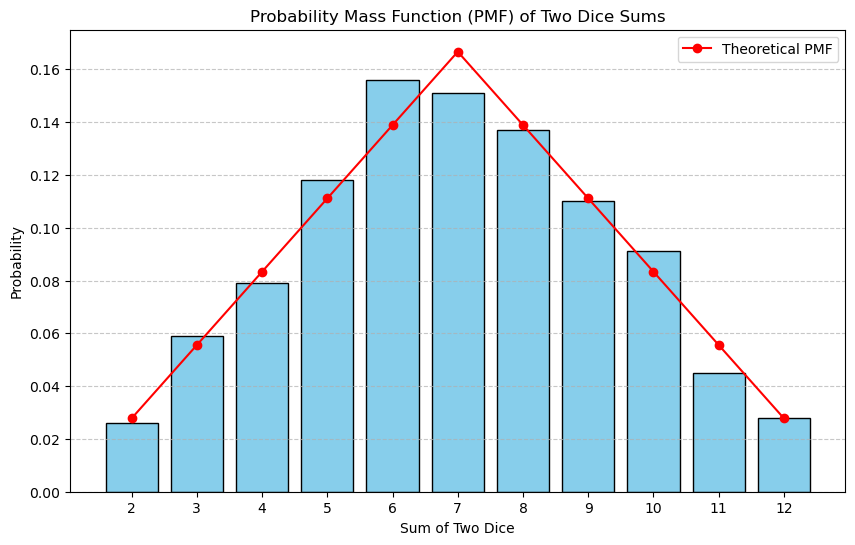

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict

def dice_roll_experiment(num_rolls=1000):
    sum_counts = defaultdict(int)
    
    possible_sums = range(2, 13)
    
    for _ in range(num_rolls):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        total = die1 + die2
        sum_counts[total] += 1
    
    probabilities = {s: sum_counts.get(s, 0) / num_rolls for s in possible_sums}
    
    return probabilities

def plot_pmf(probabilities):
    sums = sorted(probabilities.keys())
    probs = [probabilities[s] for s in sums]
    
    plt.figure(figsize=(10, 6))
    plt.bar(sums, probs, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Probability')
    plt.title('Probability Mass Function (PMF) of Two Dice Sums')
    plt.xticks(sums)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    theoretical_probs = {
        2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36,
        7: 6/36, 8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36
    }
    theoretical = [theoretical_probs[s] for s in sums]
    plt.plot(sums, theoretical, 'ro-', label='Theoretical Probability')
    
    plt.legend()
    plt.show()

probabilities = dice_roll_experiment(1000)

print("Probability Distribution:")
for s, p in sorted(probabilities.items()):
    print(f"Sum {s}: {p:.4f} ({p*100:.1f}%)")

plot_pmf(probabilities)